# FDW Crop Production Data Analysis - Mali

In [1]:
import os, sys, glob, json
from itertools import product, compress, chain
from functools import reduce
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import requests
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
from tools import save_hdf, save_npz, load_npz, PrintAdminUnits, PlotAdminShapes
from tools import FDW_PD_Sweeper, FDW_PD_AvalTable, FDW_PD_Compiling, FDW_PD_GrainTypeAgg, FDW_PD_ValidateFnidName
from tools import FDW_PD_CreateAdminLink, FDW_PD_RatioAdminLink, FDW_PD_ConnectAdminLink
from tools import FDW_PD_CaliSeasonYear
from tools_graphic import PlotBarProduction, PlotLinePAY, PlotHeatCropSystem, PlotHeatSeasonData
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
pd.options.mode.chained_assignment = None

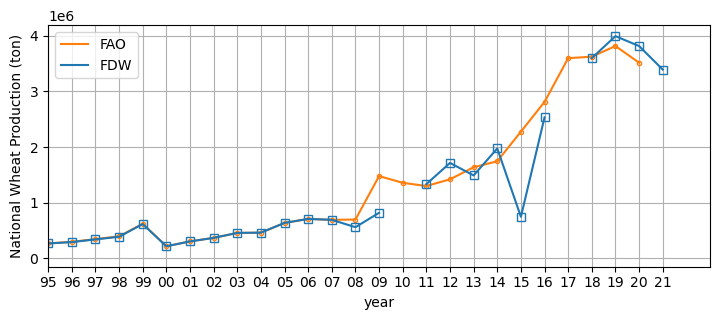

In [7]:
#%% Validation with FAO-STAT national production data
# Load GSCD crop data -------------------------------- # 
country_iso, country_name, product_name_fdw, product_name_fao = 'ML', 'Mali', 'Maize', 'Maize (corn)'
df = pd.read_hdf('../data/crop/adm_crop_production_%s.hdf' % country_iso)
df = df[df['gscd_code']=='calibrated']; fnids = list(df['fnid'].unique())
df = df[
    (df['product'] == product_name_fdw) &
    (df['indicator'] == 'production')
]
df['year'] = df['harvest_year']
data_fdw = df.pivot_table(index='year',columns='product',values='value',aggfunc='sum').sum(1).rename('FDW')
# ---------------------------------------------------- #

# Load FAO-STAT National Production Data ------------- #
df = pd.read_csv('../data/crop/adm_fao_stat.csv', index_col=0)
data_fao = df[
    (df['cnt_name'] == country_name) &
    (df['cpc2_name'] == product_name_fao) &
    (df['indicator'] == 'Production')
].set_index('year')['value']
# ---------------------------------------------------- #
data = pd.concat([data_fao, data_fdw], axis=1, keys=['FAO','FDW']).sort_index()
ax = data.plot(xlim=[1980,2023],figsize=[7,3],grid=True, markerfacecolor='None',color=['tab:orange','tab:blue'])
marker = ['.','s']
for i, line in enumerate(ax.get_lines()):
    line.set_marker(marker[i])
ax.set_ylabel('National Wheat Production (ton)')
years = data.index
ax.set_xticks(years)
ax.set_xticklabels(['%02d'% yr for yr in np.mod(years,100)])
ax.set_xlim([1995, 2023])
plt.tight_layout(pad=0)
plt.show()